<a href="https://colab.research.google.com/github/Dan5049/MPC-MLF/blob/main/Final%20project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
## MPA-MLF
**Daniel Havránek**


In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model, model_to_dot

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl

# from keras.datasets import cifar10
# from sklearn.neighbors import KNeighborsClassifier
# from keras.backend import clear_session

In [46]:
from google.colab import drive 
drive.mount('/content/drive')

csv_test = np.load("/content/drive/My Drive/MLF/csv_test.npy")
csv_train = np.load("/content/drive/My Drive/MLF/csv_train.npy")
y_train_loaded = pd.read_csv("/content/drive/My Drive/MLF/y_train.csv")

y_train_loaded = y_train_loaded.drop("id", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
x_train, x_test, y_train, y_test = train_test_split(csv_train, y_train_loaded, test_size=0.2)

n_classes = 3

x_train_scaled = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_scaled = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_data = (csv_test - csv_test.min()) / (csv_test.max() - csv_test.min())

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train_0.to_numpy().reshape(-1,1), num_classes=n_classes)
y_test_0 = y_test - 1
y_test_encoded = to_categorical(y_test_0.to_numpy().reshape(-1,1), num_classes=n_classes)

In [71]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 2288)              0         
                                                                 
 dense_48 (Dense)            (None, 128)               292992    
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 3)                 387       
                                                                 
Total params: 309,891
Trainable params: 309,891
Non-trainable params: 0
_________________________________________________________________


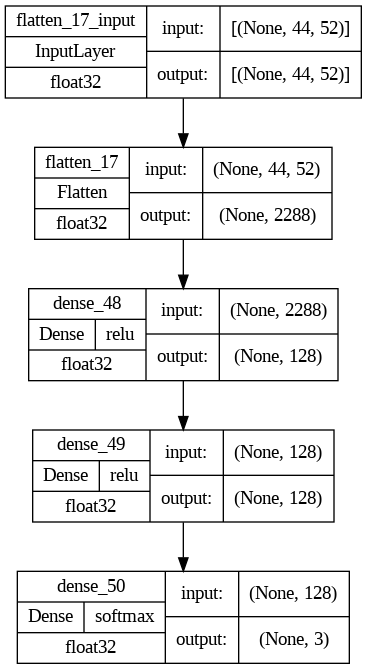

In [72]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [73]:
optimizer = Adam(learning_rate = 0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_split = 0.2, verbose=1)

Epoch 1/200
166/166 [==============================] - 2s 6ms/step - loss: 0.6424 - accuracy: 0.7156 - val_loss: 0.4798 - val_accuracy: 0.8136
Epoch 2/200
166/166 [==============================] - 1s 5ms/step - loss: 0.3668 - accuracy: 0.8628 - val_loss: 0.3284 - val_accuracy: 0.8898
Epoch 3/200
166/166 [==============================] - 1s 4ms/step - loss: 0.2597 - accuracy: 0.9028 - val_loss: 0.2629 - val_accuracy: 0.9042
Epoch 4/200
166/166 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9402 - val_loss: 0.2956 - val_accuracy: 0.8868
Epoch 5/200
166/166 [==============================] - 1s 4ms/step - loss: 0.1231 - accuracy: 0.9549 - val_loss: 0.2206 - val_accuracy: 0.9170
Epoch 6/200
166/166 [==============================] - 1s 4ms/step - loss: 0.1374 - accuracy: 0.9549 - val_loss: 0.1972 - val_accuracy: 0.9291
Epoch 7/200
166/166 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9738 - val_loss: 0.1656 - val_accuracy: 0.9419

In [74]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.27791157364845276
Test accuracy: 94.80676054954529 %


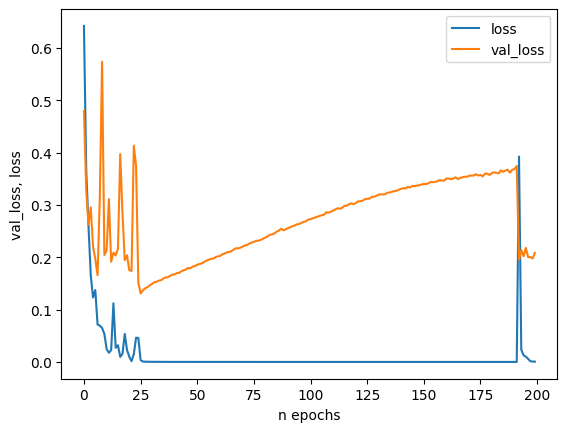

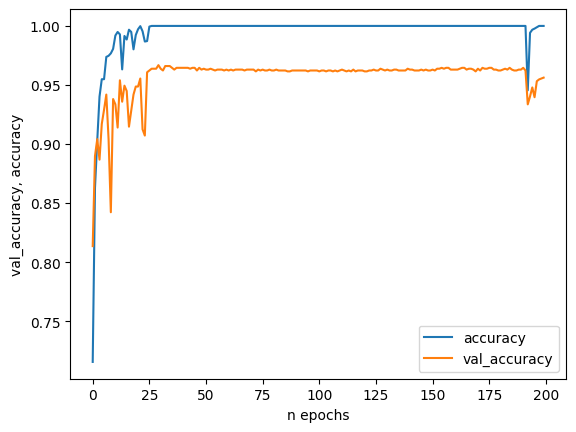

In [75]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()

111/111 [==============================] - 0s 2ms/step


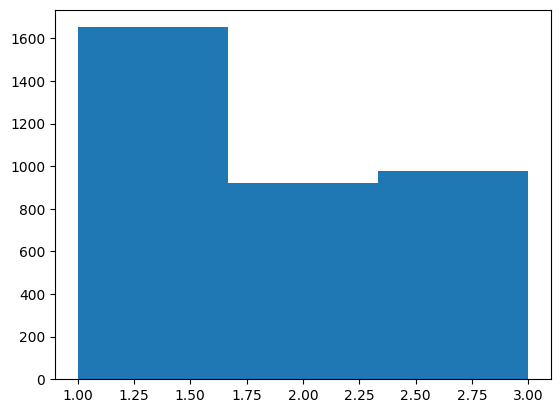

In [76]:
predicted = model.predict(x_data)

ind = np.argmax(predicted, axis=1)
res = ind + 1
result = pd.DataFrame({'id': np.arange(0, len(res)), 'target': res})
result = result.drop("id", axis=1)
result.index.name = 'id'

plt.figure()
plt.hist(result, bins=3)
plt.show()

In [77]:
from google.colab import files
result.to_csv('result.csv') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>